<a href="https://colab.research.google.com/github/Jeansds/Curso_Udemy---Deep-Learning-com-Python-de-A-a-Z/blob/master/Projeto_Deep_Auto_Encoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(previsores_treinamento, _), (previsores_teste, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
previsores_treinamento = previsores_treinamento.astype('float32') / 255
previsores_teste = previsores_teste.astype('float32') / 255

In [0]:
previsores_treinamento = previsores_treinamento.reshape((len(previsores_treinamento), np.prod(previsores_treinamento.shape[1: ])))

In [0]:
previsores_teste = previsores_teste.reshape((len(previsores_teste), np.prod(previsores_teste.shape[1: ])))

In [6]:
#encoder
autoencoder = Sequential()
autoencoder.add(Dense(units = 128, activation = 'relu', input_dim = 784))
autoencoder.add(Dense(units = 64, activation = 'relu'))
autoencoder.add(Dense(units = 32, activation = 'relu'))

In [0]:
#decoder
autoencoder.add(Dense(units = 64, activation = 'relu'))
autoencoder.add(Dense(units = 128, activation = 'relu'))
autoencoder.add(Dense(units = 784, activation = 'sigmoid'))#camada de saida

In [8]:
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
________________________________________________

In [9]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                    metrics = ['accuracy'])
autoencoder.fit(previsores_treinamento, previsores_treinamento,
                epochs = 100, batch_size = 256,
                validation_data = (previsores_teste, previsores_teste))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/100





60000/60000 [==============================] - 6s 100us/step - loss: 0.2546 - acc: 0.7839 - val_loss: 0.1704 - val_acc: 0.7984
Epoch 2/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.1533 - acc: 0.8039 - val_loss: 0.1395 - val_acc: 0.8065
Epoch 3/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.1331 - acc: 0.8081 - val_loss: 0.1256 - val_acc: 0.8087
Epoch 4/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.1239 - acc: 0.8097 - val_loss: 0.1193 - val_acc: 0.8091
Epoch 5/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.1182 - acc: 0.8106 - val_loss: 0.1154 - val_acc: 0.8092
Epoch 6/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.1140 - acc: 0.8113 - val_loss: 0.1109 - val_acc: 0.8106
Epoch 7/100
60000

In [0]:
dimensao_original = Input(shape = (784, ))
camada_encoder_1 = autoencoder.layers[0]
camada_encoder_2 = autoencoder.layers[1]
camada_encoder_3 = autoencoder.layers[2]
encoder = Model(dimensao_original, 
                camada_encoder_3(camada_encoder_2(camada_encoder_1(dimensao_original))))

In [11]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [0]:
imagens_codificadas = encoder.predict(previsores_teste)
imagens_decodificadas = autoencoder.predict(previsores_teste)

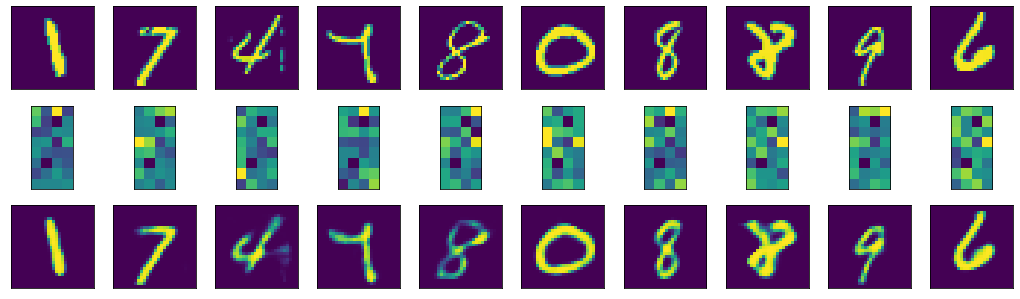

In [14]:
numero_imagens = 10
imagens_teste = np.random.randint(previsores_teste.shape[0], size = numero_imagens)# seleciona 10 imagens e um intervalo de 0 a 10000
plt.figure(figsize=(18, 18))
for i, indice_imagem in enumerate(imagens_teste):
  # imagem original
  eixo = plt.subplot(10, 10, i + 1)
  plt.imshow(previsores_teste[indice_imagem].reshape(28, 28))
  plt.xticks(())
  plt.yticks(())
    
  # imagem codificada
  eixo = plt.subplot(10, 10, i + 1 + numero_imagens)
  plt.imshow(imagens_codificadas[indice_imagem].reshape(8, 4))
  plt.xticks(())
  plt.yticks(())
    
  # imagem reconstruÃ­da
  eixo = plt.subplot(10, 10, i + 1 + numero_imagens * 2)
  plt.imshow(imagens_decodificadas[indice_imagem].reshape(28, 28))
  plt.xticks(())
  plt.yticks(())